In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'water_dataX.csv'
data = pd.read_csv(file_path, encoding="ISO-8859-1")
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [2]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [3]:
# Convert columns to numeric types, forcing errors to NaN
numeric_columns = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 
                   'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)', 
                   'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


In [4]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [5]:
data.dropna(inplace = True)
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003
1982,1161,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003
1984,1328,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003


In [6]:
data = data.replace([np.inf, -np.inf], np.nan)
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003
1982,1161,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003
1984,1328,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003


In [7]:
# # Set the style for the plots
# sns.set(style="whitegrid")

# # Create histograms for each numeric column
# plt.figure(figsize=(16, 12), dpi = 200)
# for i, col in enumerate(numeric_columns, 1):
#     plt.subplot(3, 3, i)
#     sns.histplot(data[col].dropna(), kde=True)
#     plt.title(f'Histogram of {col}')
# plt.tight_layout()
# plt.show()

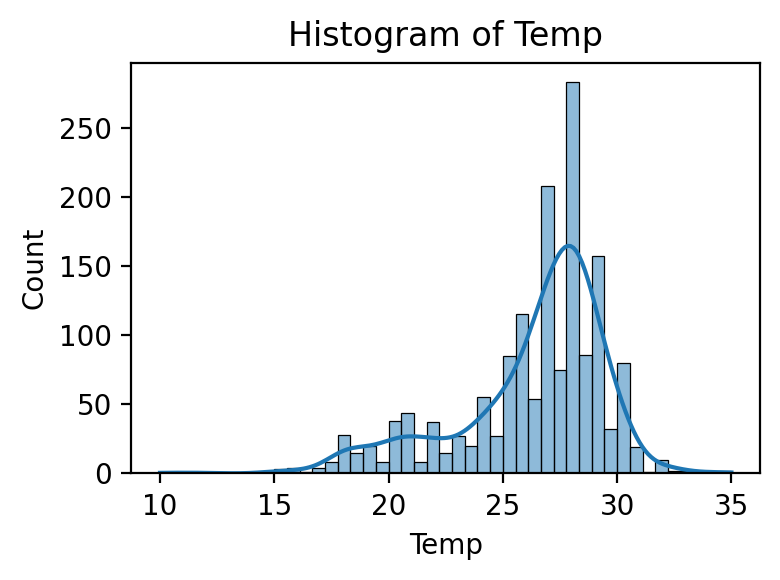

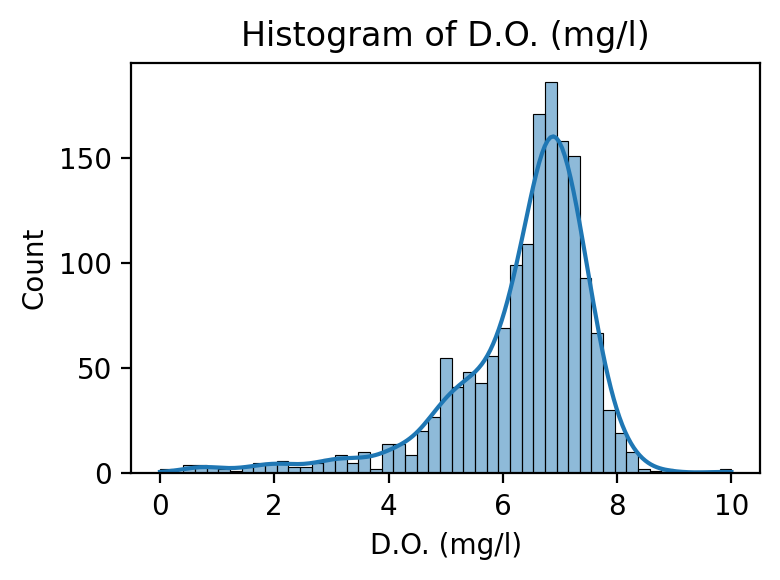

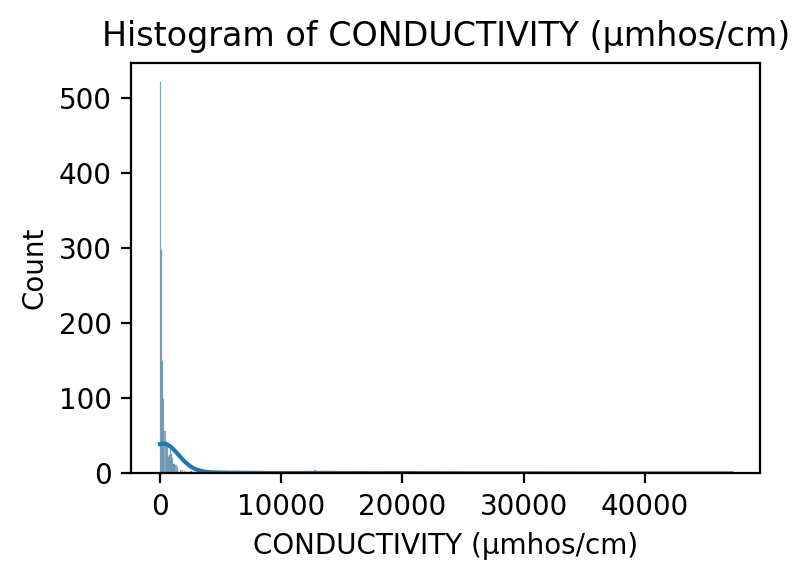

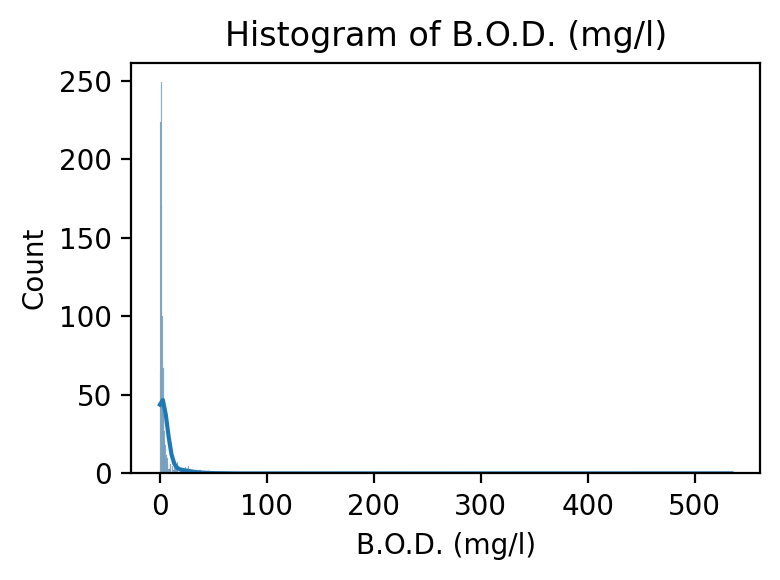

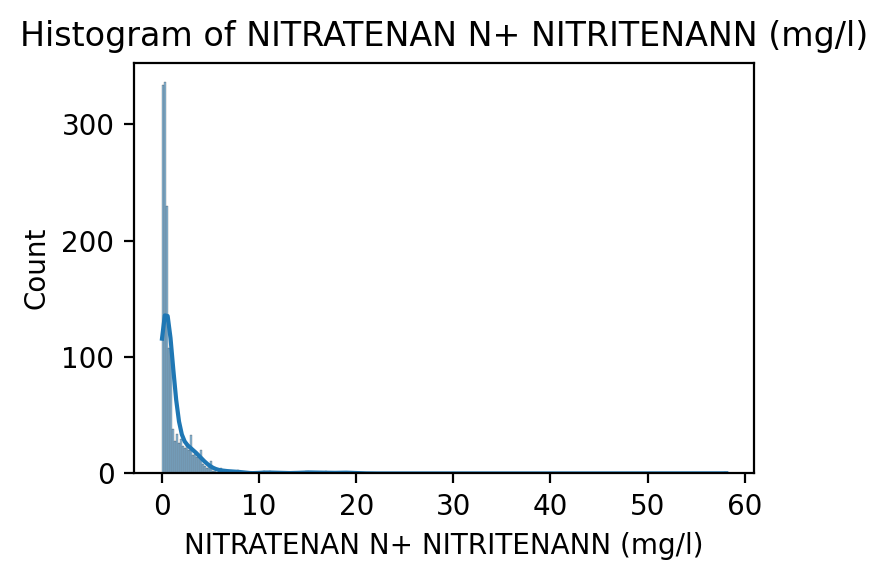

In [8]:
for i in range(len(numeric_columns)):
    if(i == 2 or i == 6 or i == 7 or i == 8):
        continue
    plt.figure(figsize = (4,3), dpi = 200)
    sns.histplot(data[numeric_columns[i]].dropna(), kde=True)
    plt.title(f'Histogram of {numeric_columns[i]}')
    plt.tight_layout()
    plt.show()

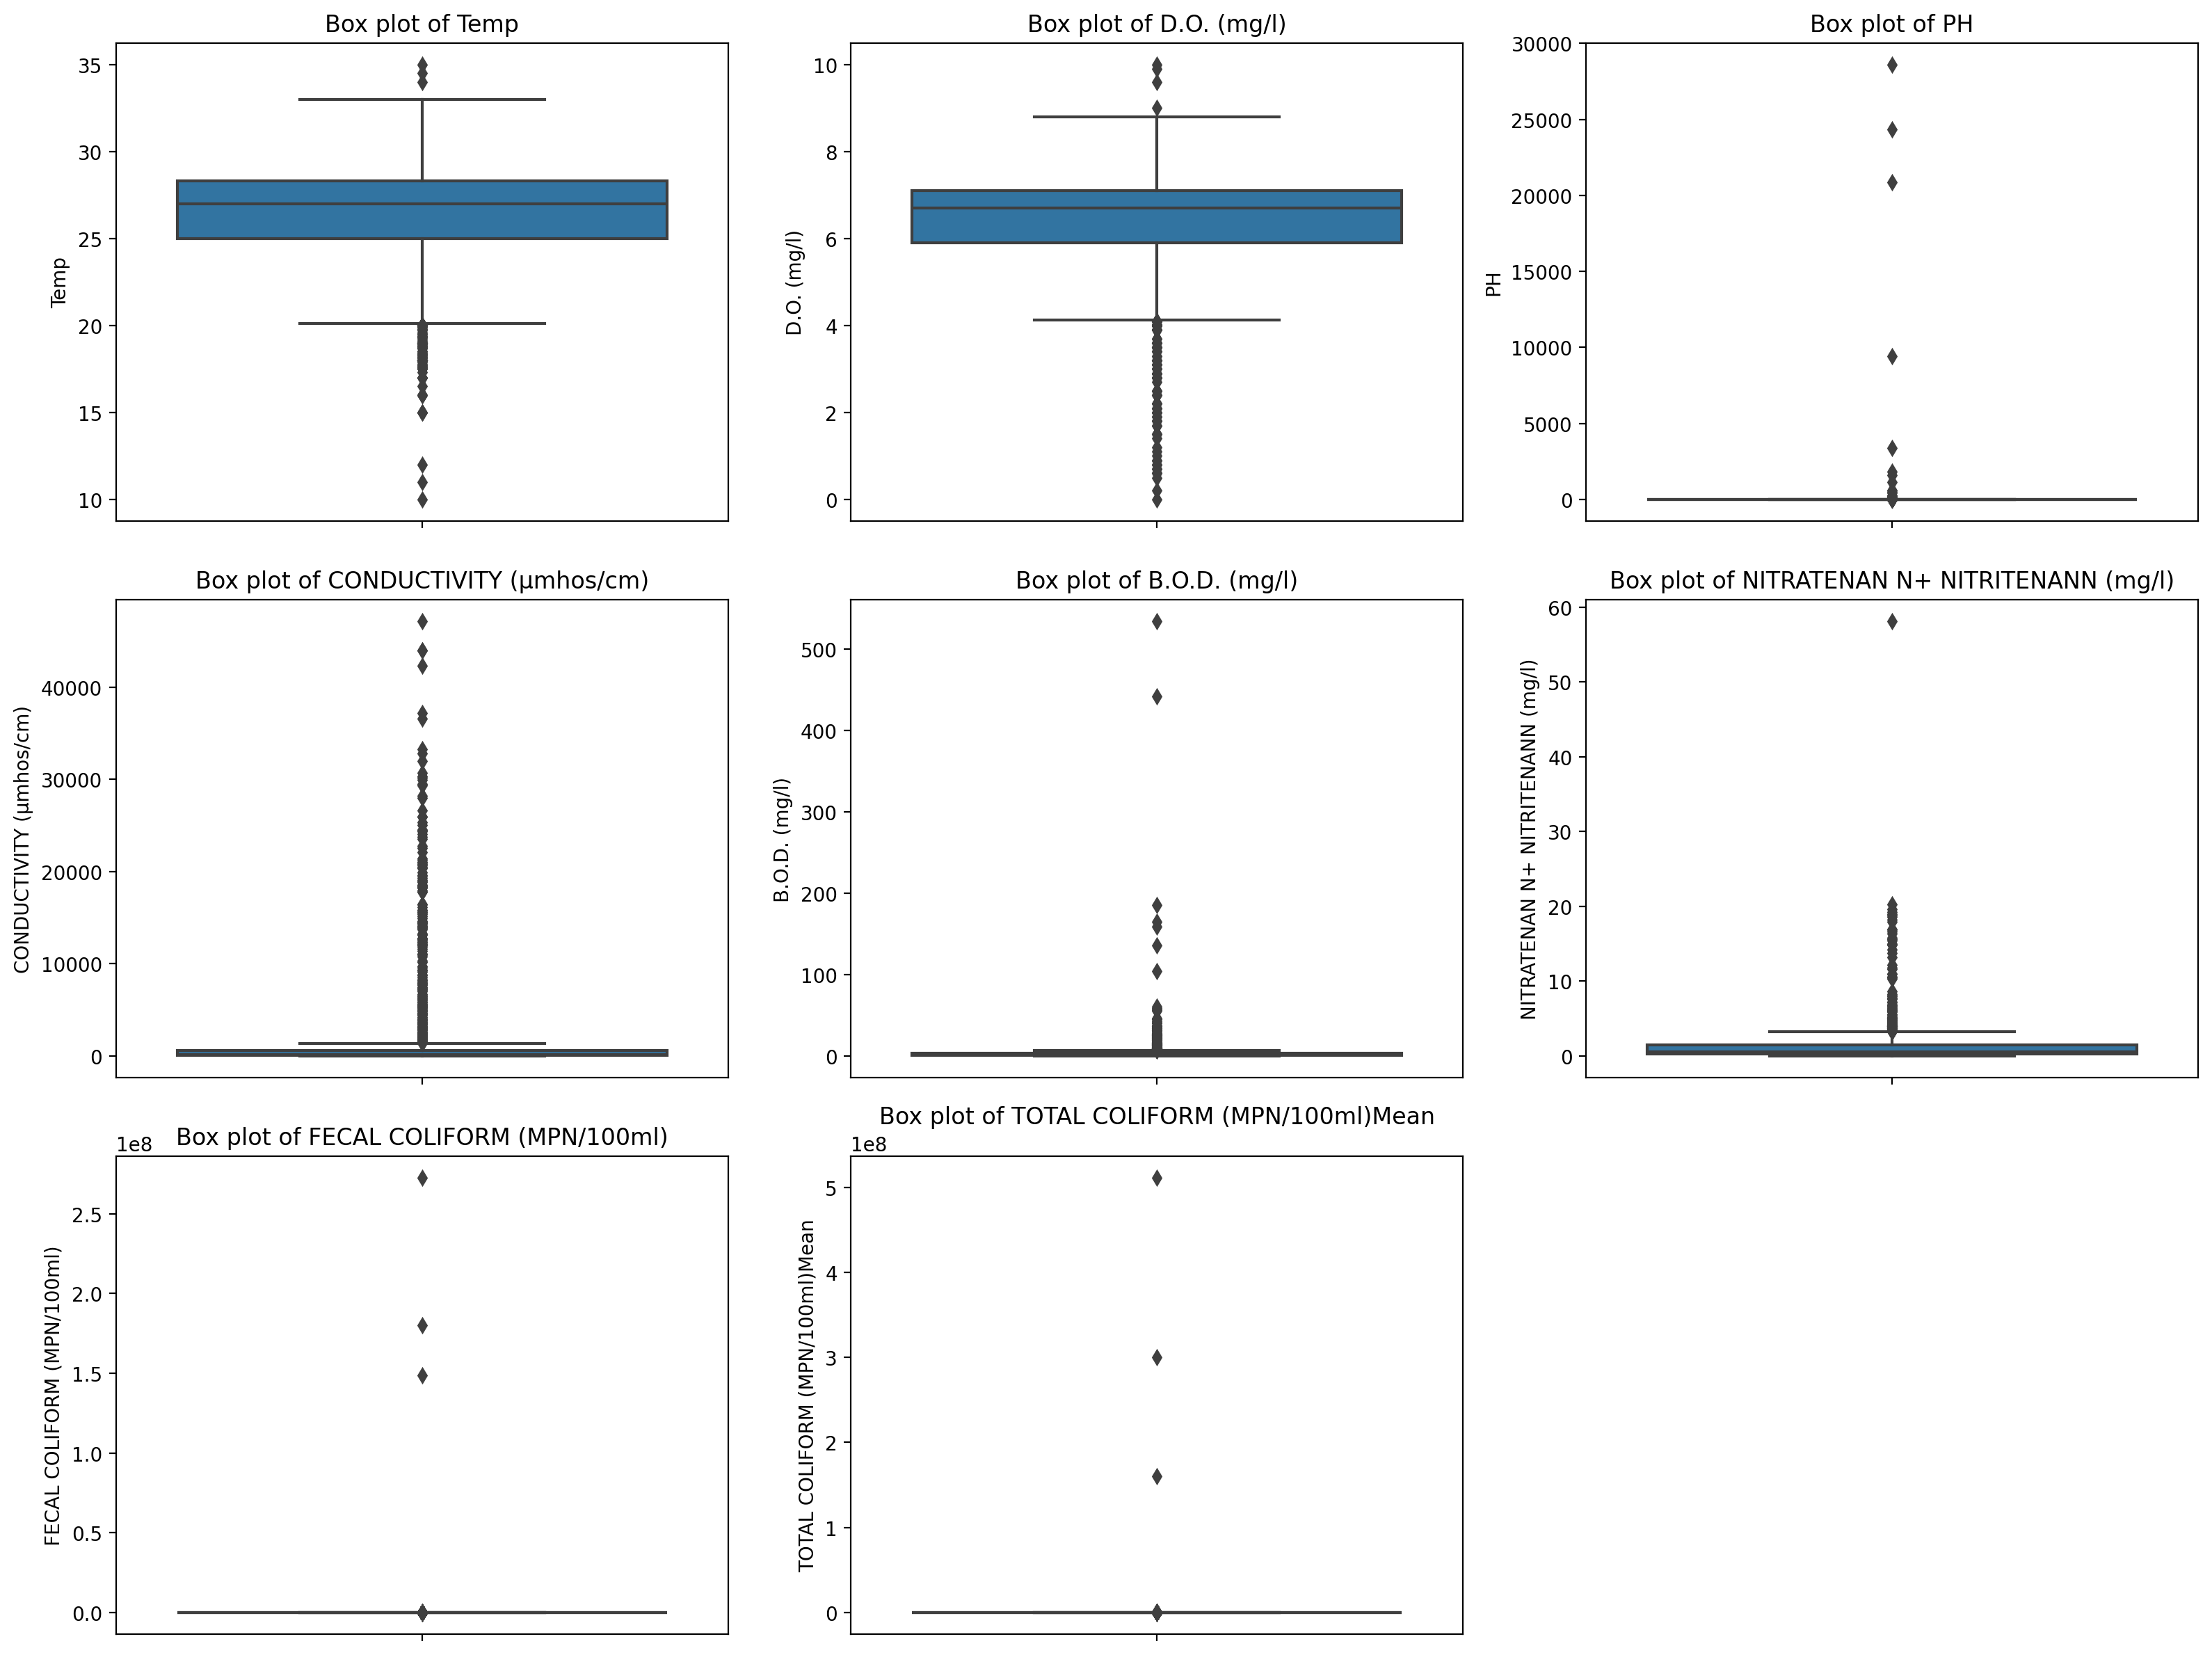

In [9]:
# Create box plots for each numeric column
plt.figure(figsize=(16, 12), dpi = 200)
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col].dropna())
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

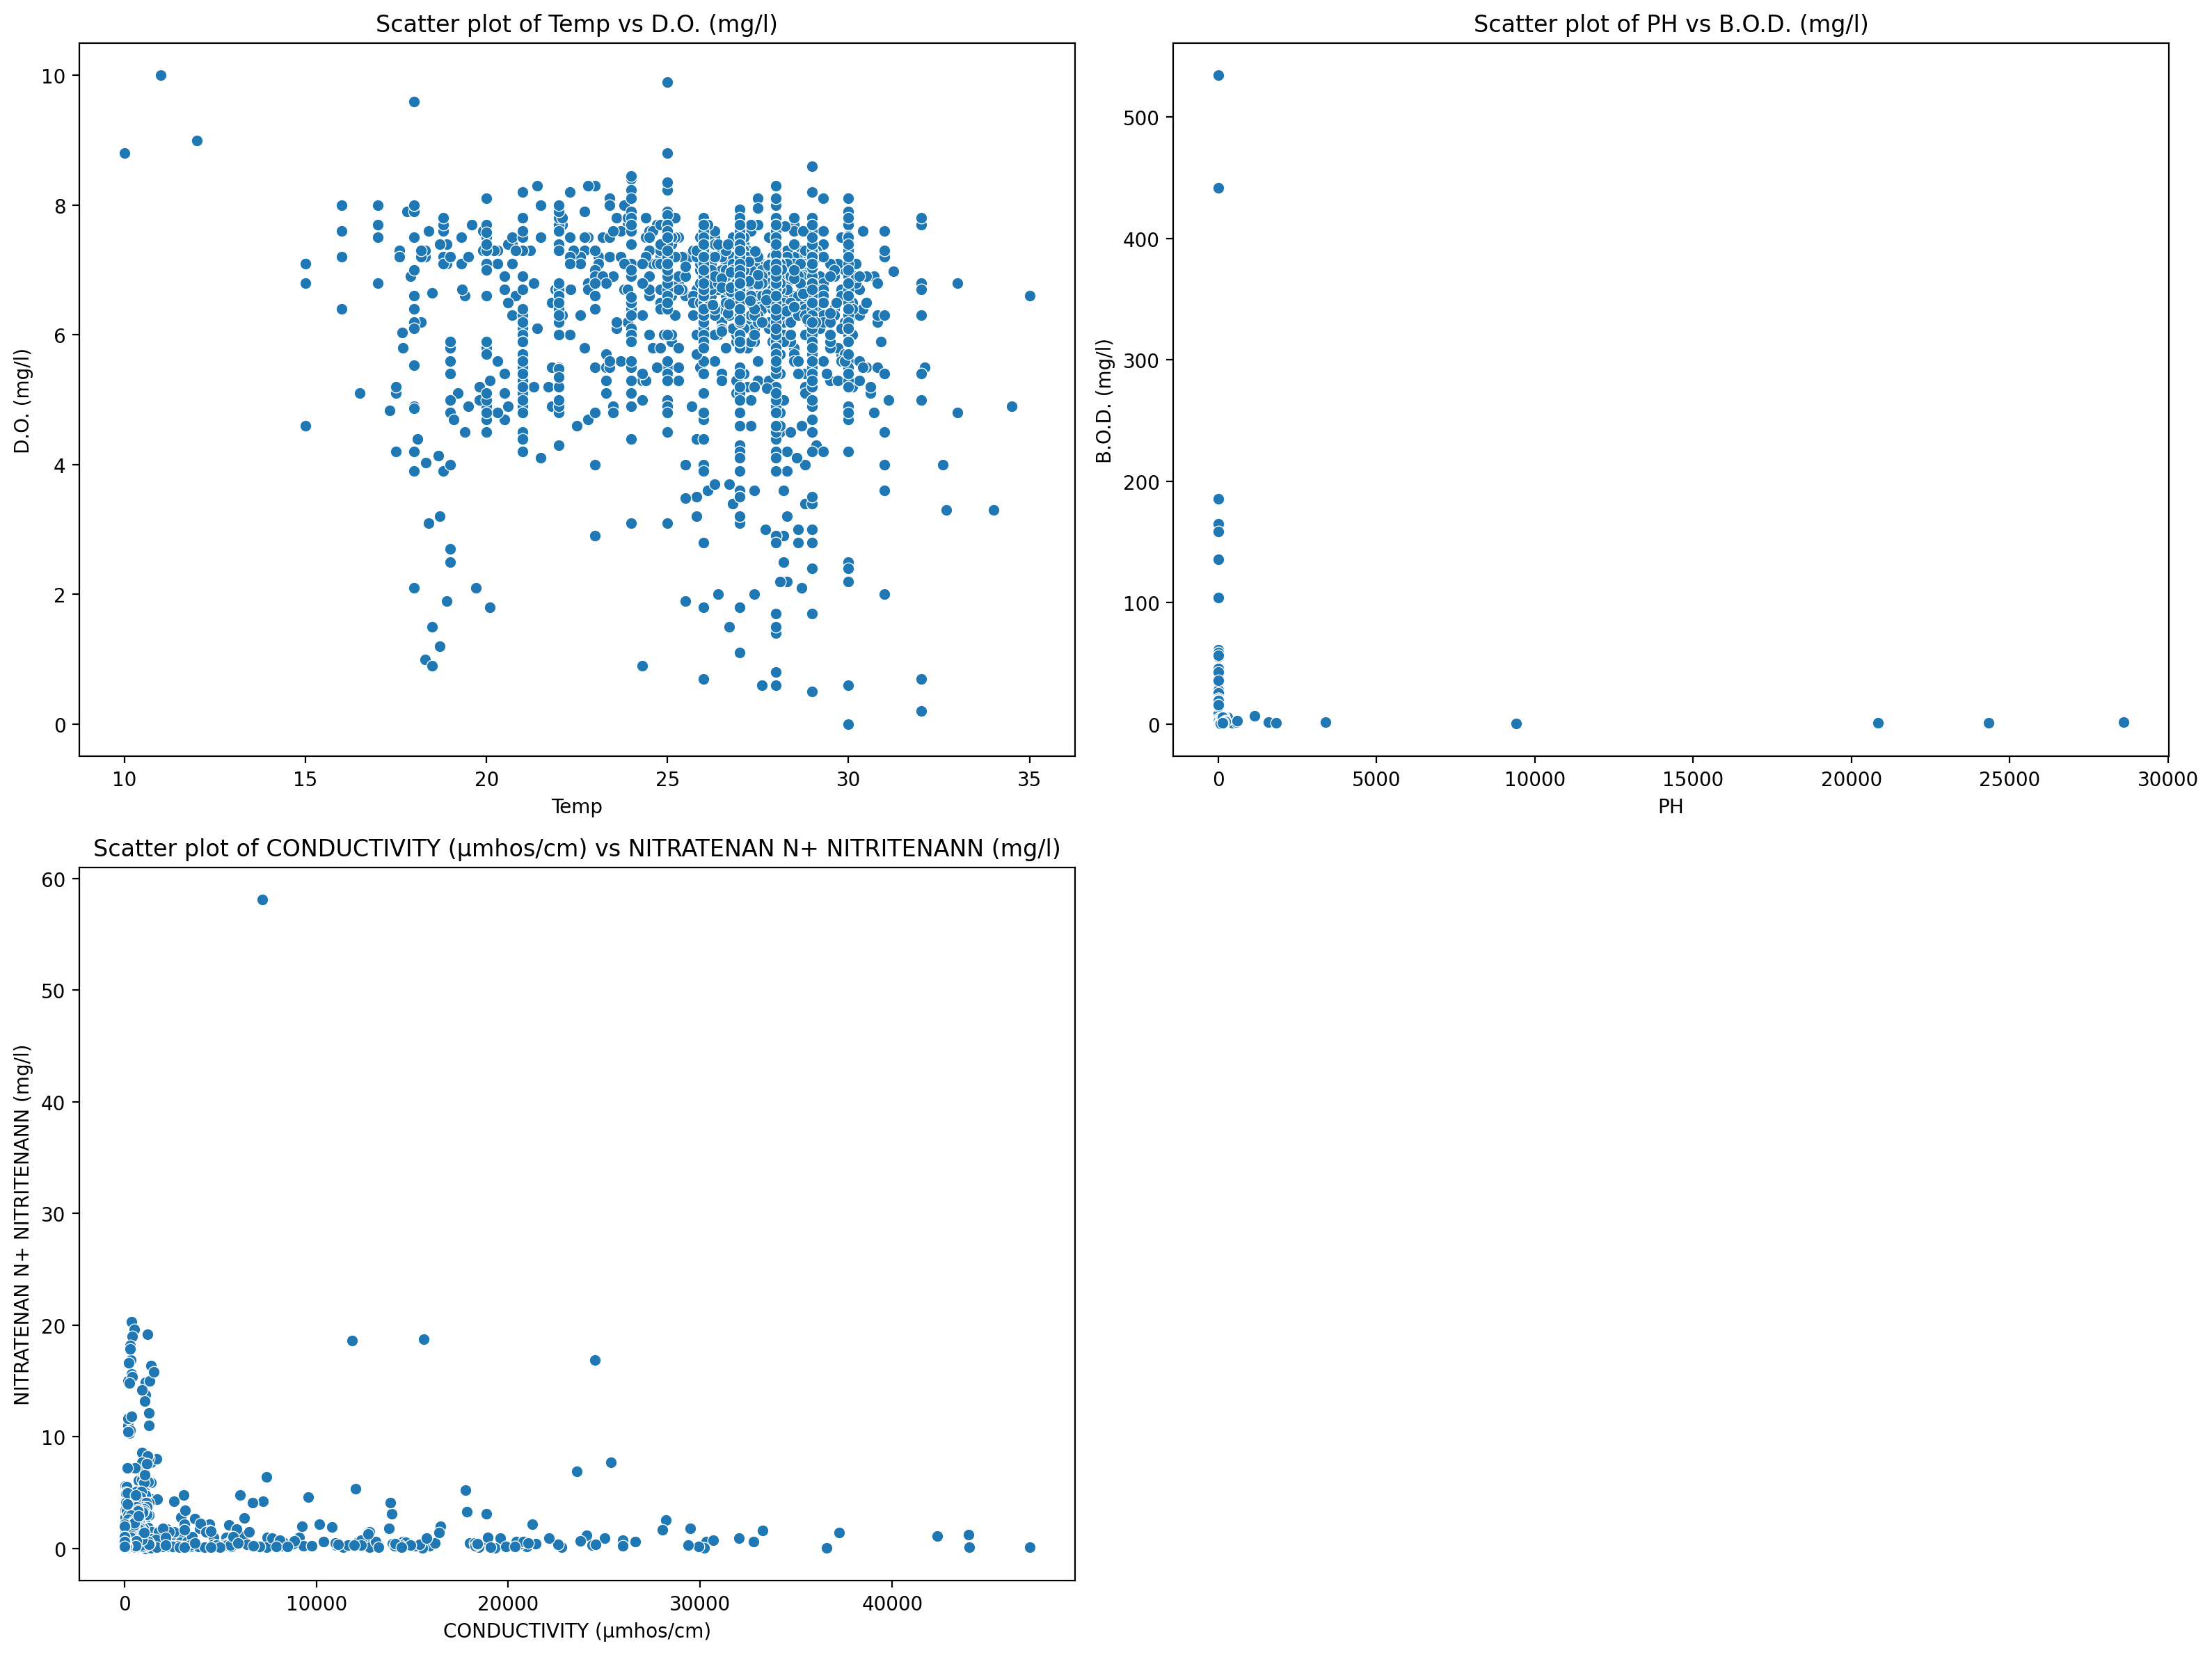

In [10]:
# Create scatter plots to see relationships between selected variables
plt.figure(figsize=(16, 12), dpi = 200)
pairs = [('Temp', 'D.O. (mg/l)'), ('PH', 'B.O.D. (mg/l)'), ('CONDUCTIVITY (µmhos/cm)', 'NITRATENAN N+ NITRITENANN (mg/l)')]
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[x], y=data[y])
    plt.title(f'Scatter plot of {x} vs {y}')
plt.tight_layout()
plt.show()

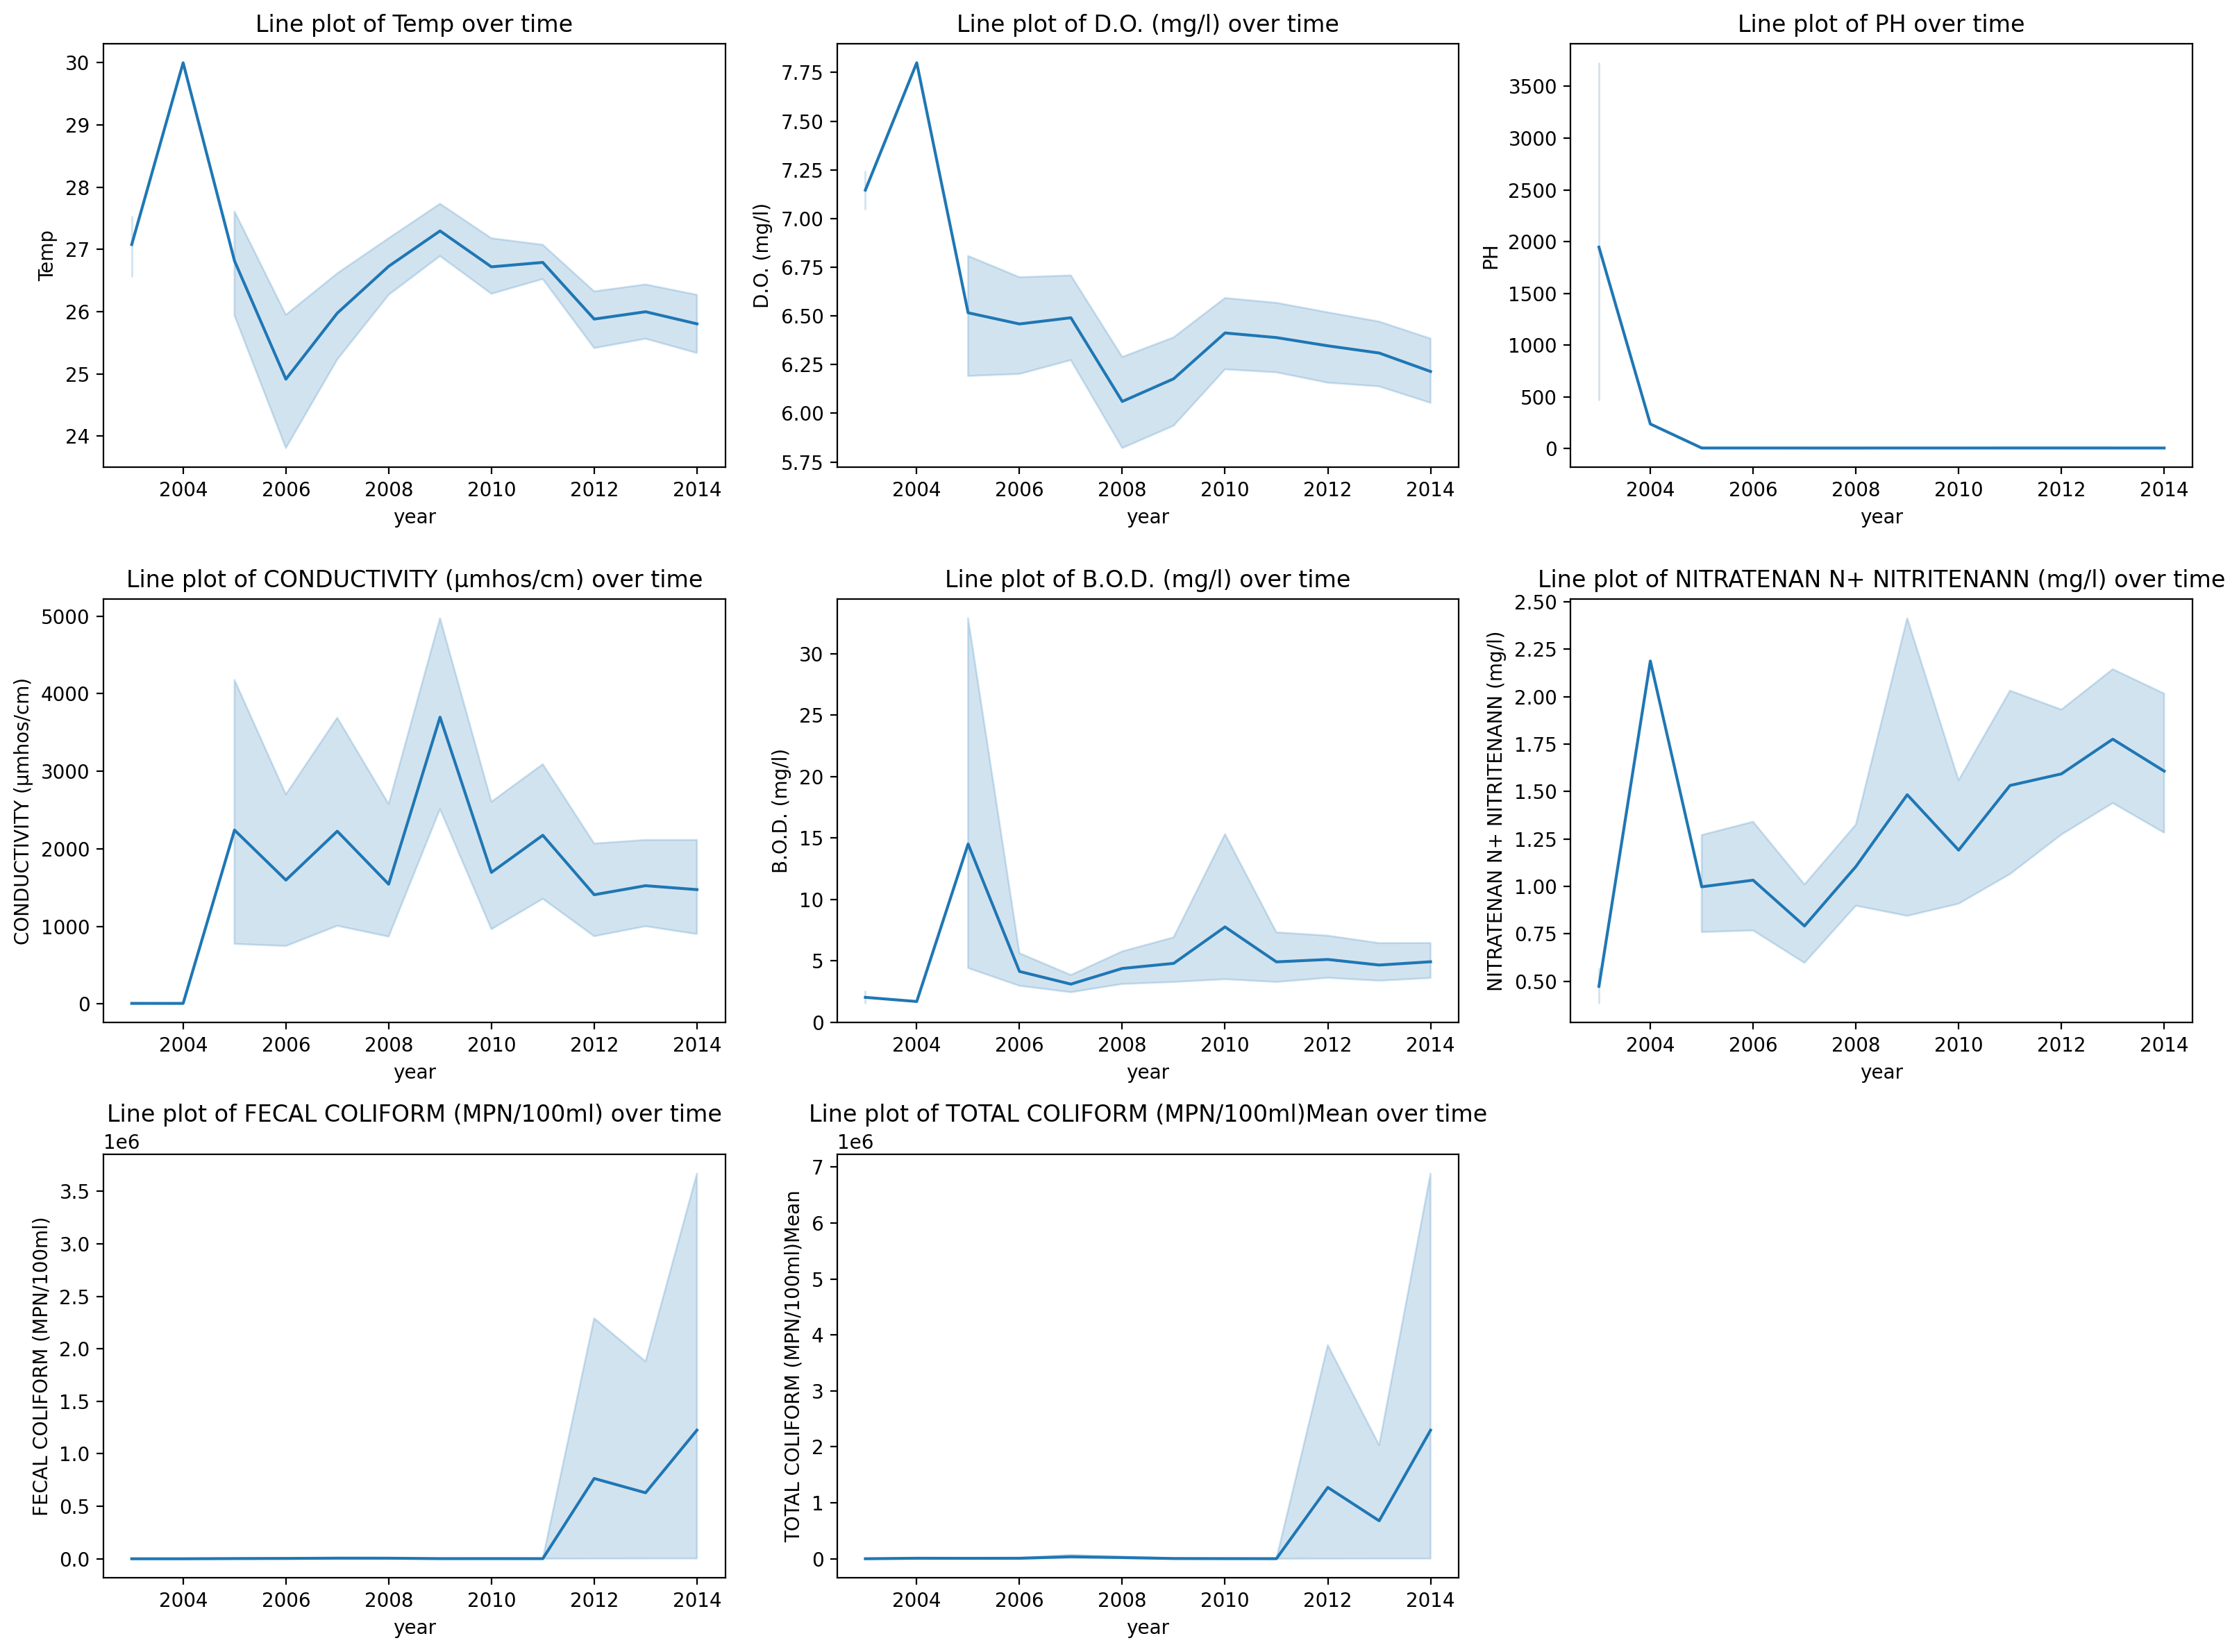

In [11]:
# Create line plots to observe trends over time
plt.figure(figsize=(16, 12), dpi = 200)
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(data=data, x='year', y=col)
    plt.title(f'Line plot of {col} over time')
plt.tight_layout()
plt.savefig('trends_over_time.png')
plt.show()

In [12]:
# !pip install geopandas
# import geopandas as gpd
# gdf = gpd.read_file('Indian_States.shp')
# gdf

In [13]:
numeric_columns.remove('PH')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target
X = data[numeric_columns]
y = data['PH']  # Assuming 'PH' is the target variable for WQI, modify as needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 248944.72741191825
R^2 Score: -20.092296548949914


In [15]:
details = {
    'y_test' : list(y_test),
    'y_pred' : list(y_pred),
}
temp = pd.DataFrame(details)
temp

,y_test,y_pred
0,6.700,6.85442
1,6.900,6.71430
2,7.125,7.25060
3,6.700,7.13581
4,7.700,7.49027
...,...,...
311,6.100,6.68153
312,7.200,7.44395
313,7.700,7.67175
314,7.480,7.51483


In [16]:
#initialization
start=2
end=1779
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [17]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [18]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [19]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [20]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [21]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [22]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [23]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.head()
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [24]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.300,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,6.4,6.7,414.0,1.0,0.200,9423.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,7.3,178.0,6.7,1.5,0.138,190.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1982,1161,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,7.1,214.0,6.8,2.3,0.585,350.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1984,1328,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,6.9,146.0,7.1,2.0,0.506,38.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,22.48,77.68
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,7.0,136.0,7.5,1.4,0.609,205.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06


In [25]:
data['quality'] = data.wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
data

,station,location,state,do,ph,co,bod,na,tc,year,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,quality
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,Poor
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Very Poor
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Very Poor
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.300,5672.0,2014,...,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44,Unsuitable
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,6.4,6.7,414.0,1.0,0.200,9423.0,2014,...,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44,Unsuitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,7.3,178.0,6.7,1.5,0.138,190.0,2003,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Poor
1982,1161,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,7.1,214.0,6.8,2.3,0.585,350.0,2003,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Poor
1984,1328,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,6.9,146.0,7.1,2.0,0.506,38.0,2003,...,100,100,0.0,28.10,23.40,0.90,2.8,22.48,77.68,Very Poor
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,7.0,136.0,7.5,1.4,0.609,205.0,2003,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Poor


In [26]:
#calculation overall wqi for each year
yearwise_wqi = data.groupby('year')['wqi'].mean()

In [27]:
yearwise_wqi

year
2003    66.759200
2004    55.200000
2005    73.029388
2006    74.425542
2007    74.629070
2008    72.725414
2009    74.354570
2010    76.534323
2011    77.763256
2012    78.397373
2013    78.031765
2014    77.841538
Name: wqi, dtype: float64

In [28]:
yearwise_wqi = yearwise_wqi.reset_index(level=0,inplace=False)
yearwise_wqi

,year,wqi
0,2003,66.759200
1,2004,55.200000
2,2005,73.029388
3,2006,74.425542
4,2007,74.629070
5,2008,72.725414
6,2009,74.354570
7,2010,76.534323
8,2011,77.763256
9,2012,78.397373


In [29]:
yearwise_wqi['quality'] = yearwise_wqi.wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
yearwise_wqi

,year,wqi,quality
0,2003,66.759200,Poor
1,2004,55.200000,Poor
2,2005,73.029388,Poor
3,2006,74.425542,Poor
4,2007,74.629070,Poor
5,2008,72.725414,Poor
6,2009,74.354570,Poor
7,2010,76.534323,Very Poor
8,2011,77.763256,Very Poor
9,2012,78.397373,Very Poor


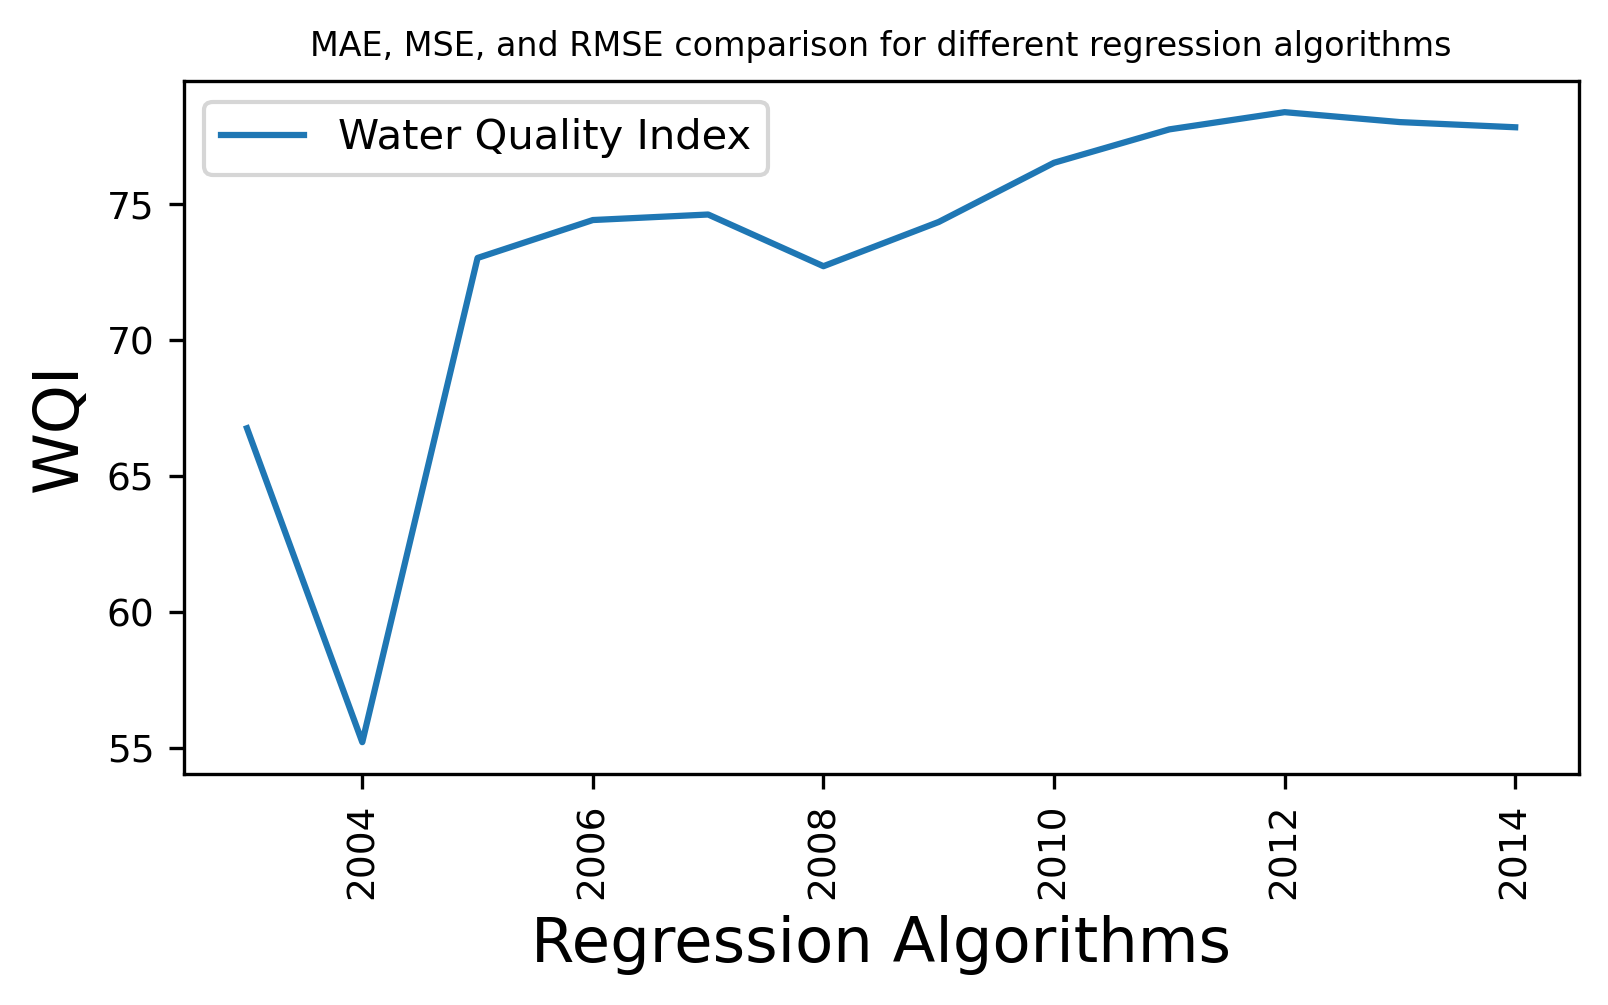

In [8]:
plt.figure(figsize = (6,3), dpi = 300)
plt.plot(yearwise_wqi['year'], yearwise_wqi['wqi'], label = 'Water Quality Index')
plt.title('MAE, MSE, and RMSE comparison for different regression algorithms', fontsize = 8)
plt.xlabel('Regression Algorithms', fontsize = 15)
plt.ylabel('WQI', fontsize = 15)
plt.xticks(fontsize = 9, rotation = 90)
plt.yticks(fontsize = 9)
plt.legend()
plt.show()

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Data
data = {
    'year': [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
    'wqi': [66.759200, 55.200000, 73.029388, 74.425542, 74.629070, 72.725414, 74.354570, 76.534323, 77.763256, 78.397373, 78.031765, 77.841538]
}

df = pd.DataFrame(data)

# Prepare the data
X = df[['year']]
y = df['wqi']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Results dictionary
results = {}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
results['Linear Regression'] = evaluate_model(linear_model, X_test, y_test)

# Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
results['Polynomial Regression (Degree 2)'] = evaluate_model(poly_model, X_test_poly, y_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
results['Decision Tree Regression'] = evaluate_model(tree_model, X_test, y_test)

# Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
results['Random Forest Regression'] = evaluate_model(forest_model, X_test, y_test)

# Support Vector Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
results['Support Vector Regression'] = evaluate_model(svr_model, X_test_scaled, y_test)

# Display the results
results_df = pd.DataFrame(results, index=['MSE', 'R2'])
results_df.T


,MSE,R2
Linear Regression,2.229907,0.923590
Polynomial Regression (Degree 2),26.896400,0.078369
Decision Tree Regression,44.684465,-0.531155
Random Forest Regression,6.012130,0.793989
Support Vector Regression,19.984270,0.315220


# Final Prediction

In [32]:
import warnings
warnings.filterwarnings('ignore')
predicted_wqi = linear_model.predict([[2003]])
predicted_wqi

array([65.1658744])

# Saving and Loading for getting fast results

In [33]:
import pickle
# Save Dataframe
with open('yearwise_wqi', 'wb') as f:
    pickle.dump(yearwise_wqi, f)

with open('linear_model', 'wb') as f:
    pickle.dump(linear_model, f)

In [4]:
import pickle
with open('yearwise_wqi', 'rb') as f:
    df = pickle.load(f)
df

,year,wqi,quality
0,2003,66.759200,Poor
1,2004,55.200000,Poor
2,2005,73.029388,Poor
3,2006,74.425542,Poor
4,2007,74.629070,Poor
5,2008,72.725414,Poor
6,2009,74.354570,Poor
7,2010,76.534323,Very Poor
8,2011,77.763256,Very Poor
9,2012,78.397373,Very Poor


In [35]:
with open('linear_model', 'rb') as f:
    linear_model = pickle.load(f)
linear_model

LinearRegression()